# Examples of Plotting and Animation of Wigner Functions
## Stern Gerlach interferometer

In [2]:
%reload_ext autoreload

import numpy as np 
import matplotlib.pyplot as plt
import math as math 
import cmath as cmath
from scipy import linalg as linalg
from scipy import integrate as integ
from scipy.integrate import solve_ivp



import sys
import os
sys.path.append(os.path.abspath('../src'))

from Objects import Quantum_State, Hamiltonian, Symplectic
from QIT_Functions import Extract_Qubit_Labels_Array


In [3]:
N_qubits = 1
n_modes = 1

########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)
H_1_force = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m =  r_null #np.array([[0.5],[0.0]])
H_q = H_null
r_q = 2*np.array([[1.0],[0.0]])

H_q_0_array = np.array([0 +0*1j])

H_1_force.Initialize_Constant_Hamiltonians([H_m], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[0.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

GCS = Quantum_State(N_qubits, n_modes)
GCS.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100)

GCS.Unitary_Dynamics_Numerical(H_1_force, t_array)



This is a time independent operator-valued force Hamiltonian
Initializing a Gaussian State


## Plot of First Moments, Cantrasts and Phases of the Qubi Reduced Density Matrix

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


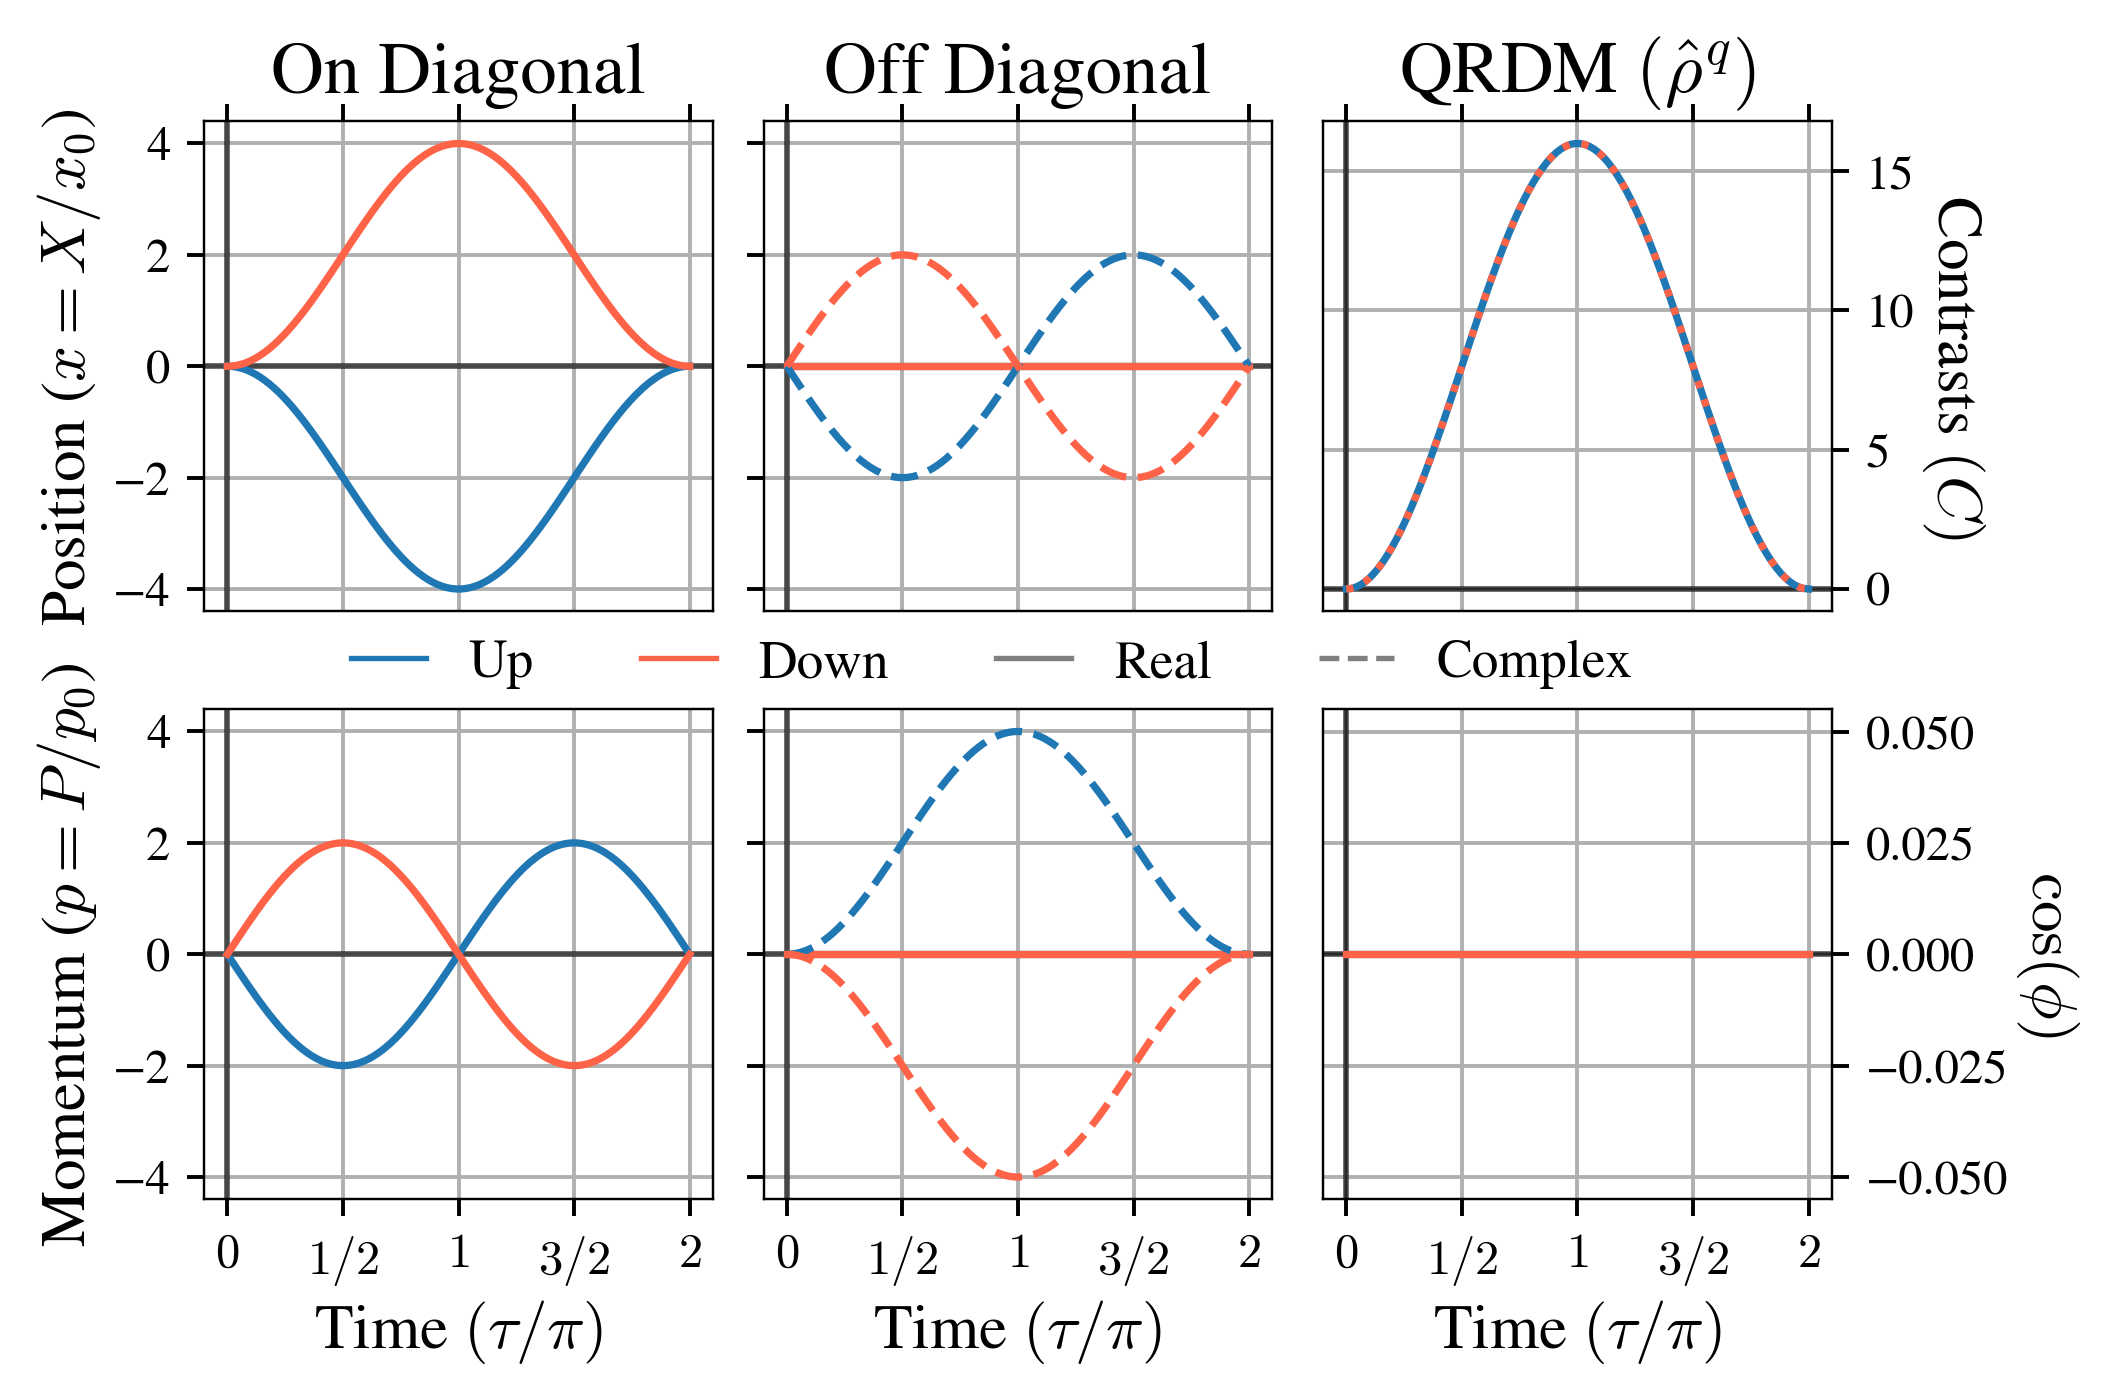

In [4]:
Parameter_list = []
array_pi = np.linspace(0,2,5)

GCS.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);

## Plots of Wigner Functions

/Users/lorenzobraccini/General Gaussian Method copy/src/Measurements.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_t[i,j] = np.trace(rho_q_PMS_unnormalize)
/Users/lorenzobraccini/General Gaussian Method copy/src/Measurements.py:62: RuntimeWarning: invalid value encountered in divide
  rho_q_t_PMS_array[i,j] = rho_q_PMS_unnormalize/prob_t[i,j]
/Users/lorenzobraccini/General Gaussian Method copy/src/Wigner_Functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  W_Diag[m,n] += (2**n_modes)*rho_q[i,i]/(np.pi**n_modes * np.sqrt(det_sigma))*np.exp(-np.transpose(r_tilde_array[m,n] - r_JK[i,i])@sigma_inv@(r_tilde_array[m,n] - r_JK[i,i]))[0,0]


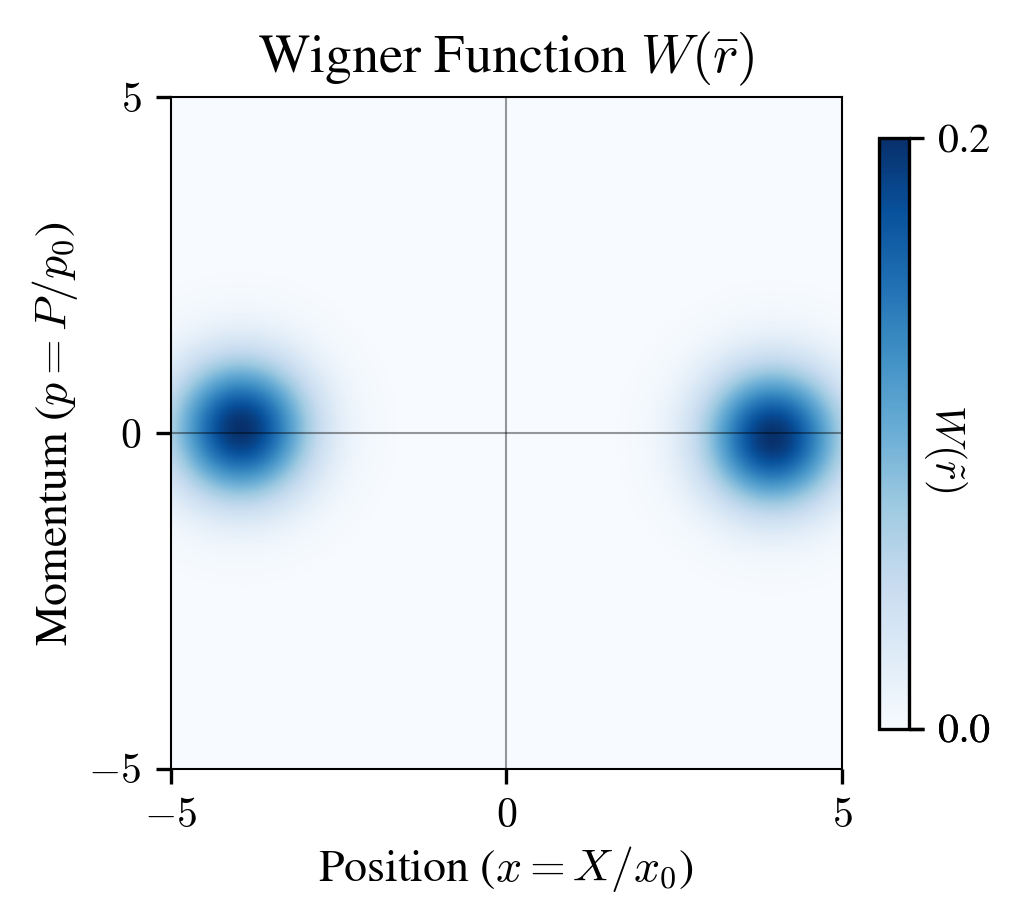

In [9]:
sigma_x = np.array([[0,1],[1,0]])/2 
steps = 100
mode_number = 0
time_index = 50
bar_limits = [0,0.5]
sigma_para = 0.7
n_frames = len(GCS.t_array)
array_tick = np.linspace(-5,5,3)
GCS.Qubit_Ideal_Measurament(sigma_x, 'Time')

GCS.Plot_Wigner_Function_Diag(steps, time_index, mode_number, sigma_para, array_tick, False)


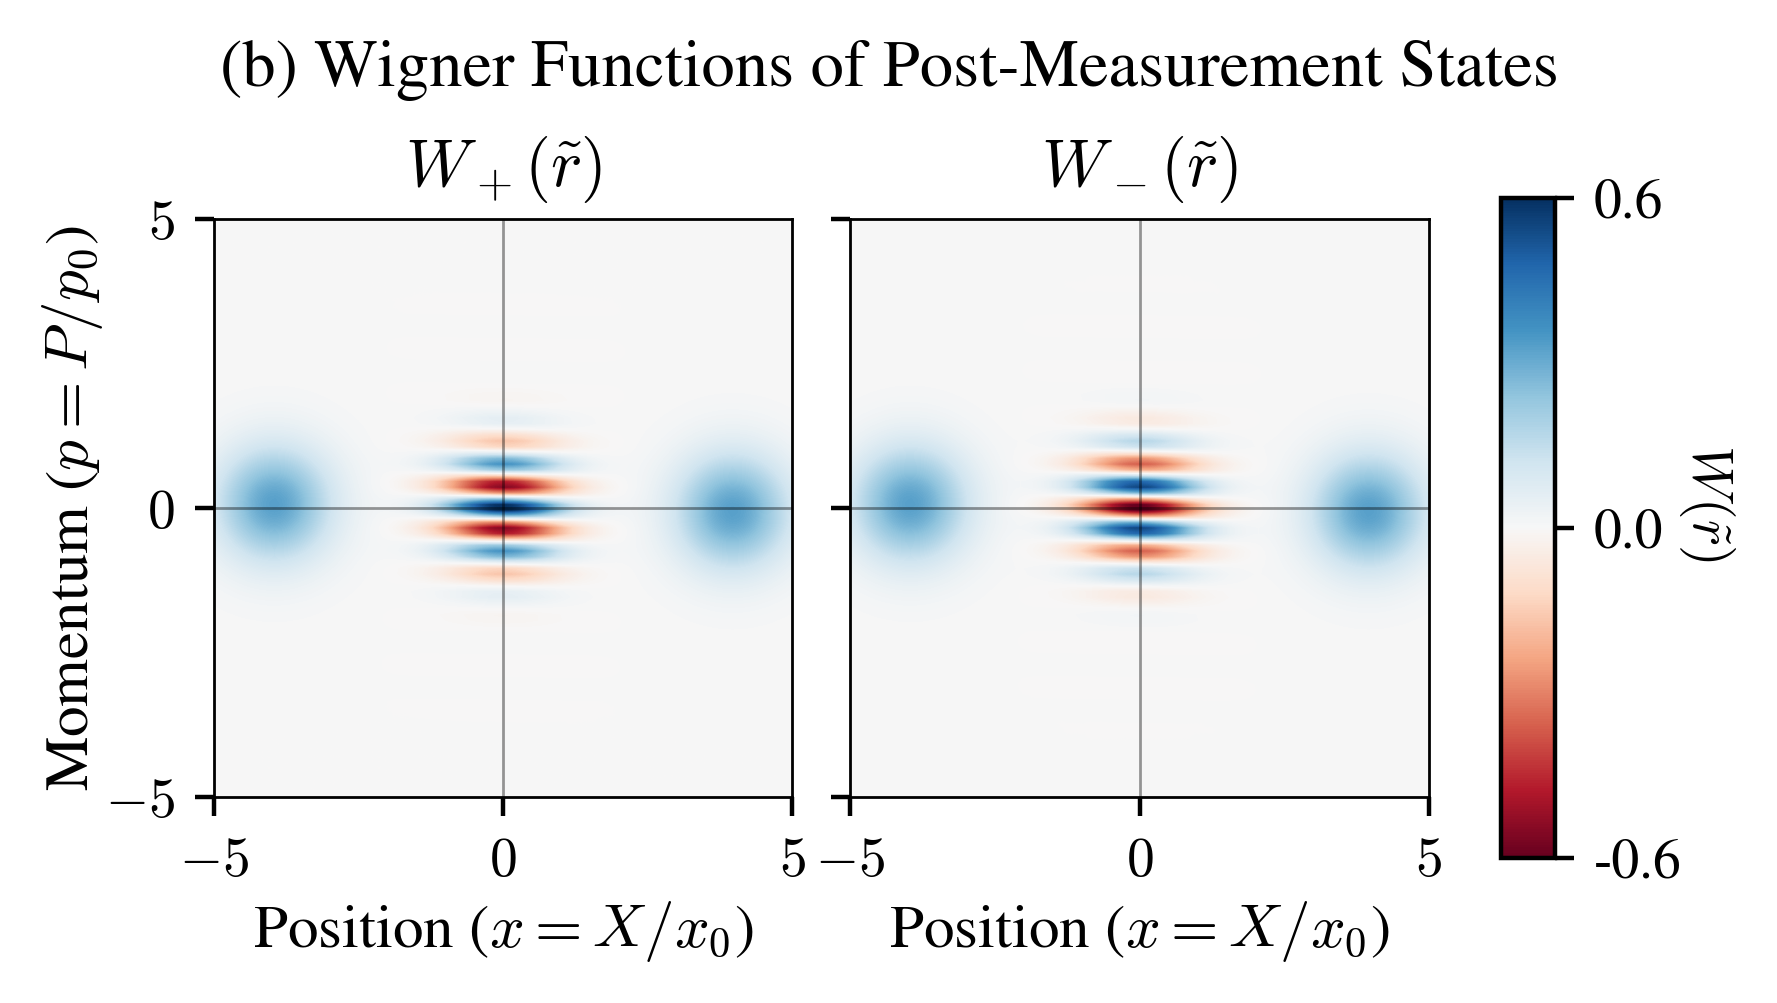

In [10]:

GCS.Plot_Wigner_Function_PMS(steps, time_index, mode_number, sigma_para, array_tick, False)

## Animation of Wigner Functions

/Users/lorenzobraccini/General Gaussian Method copy/src/Wigner_Functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  W_Diag[m,n] += (2**n_modes)*rho_q[i,i]/(np.pi**n_modes * np.sqrt(det_sigma))*np.exp(-np.transpose(r_tilde_array[m,n] - r_JK[i,i])@sigma_inv@(r_tilde_array[m,n] - r_JK[i,i]))[0,0]


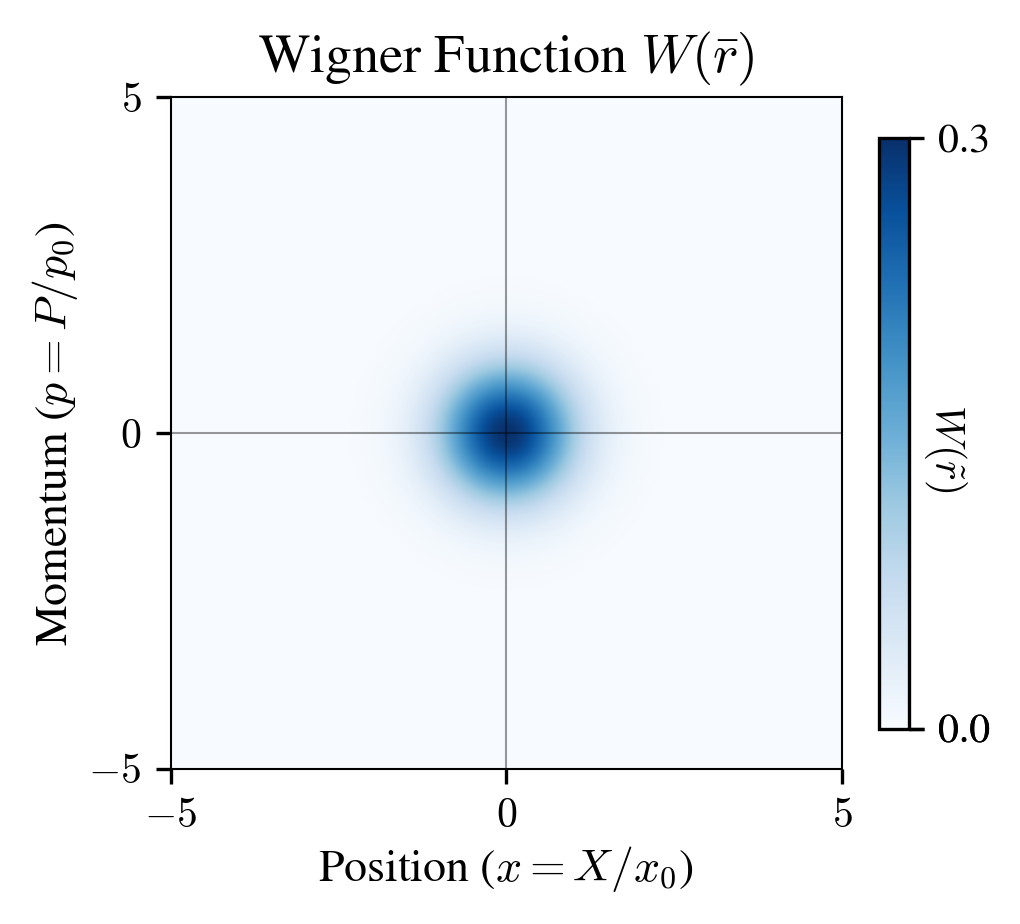

In [7]:
steps = 101
mode_number = 0
time_index = 40
bar_limits = [0,0.5]
sigma_para = 0.6
array_tick = np.linspace(-5,5,3)
n_frames = len(GCS.t_array)

GCS.Animate_Wigner_Function_Diag(steps, mode_number, sigma_para, array_tick, n_frames, False)

(100, 2, 100, 100)


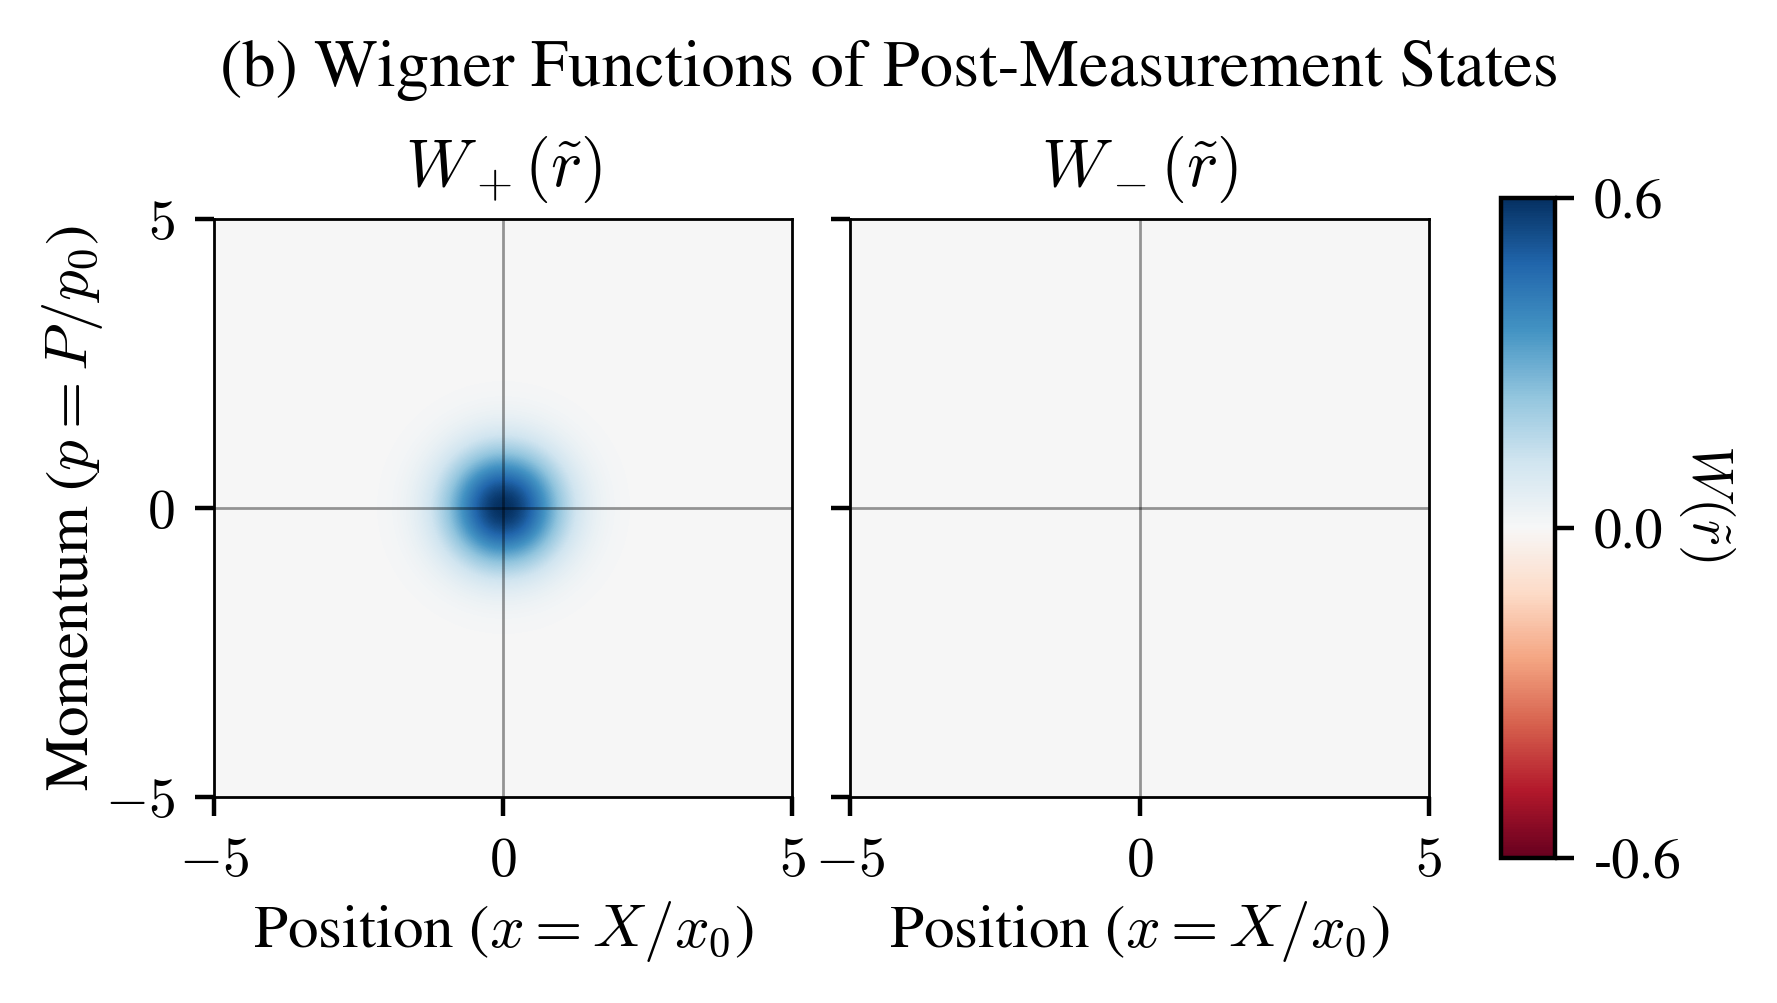

In [11]:
GCS.Animate_Wigner_Function_PMS(steps, mode_number, sigma_para, array_tick, n_frames, 'pippo.gif')